<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import pandas
import requests
from io import StringIO

import seaborn
seaborn.set_context('talk')

In [ ]:
# link del csv compartido 
# https://drive.google.com/file/d/1tgyexpYaGGm47Z-SPqUR3WuAhc0IwpxF/view?usp=sharing
# se toma solo el hash identificador
file_id = '1tgyexpYaGGm47Z-SPqUR3WuAhc0IwpxF'
dwn_url = f'https://drive.google.com/uc?export=download&id={file_id}'
url = requests.get(dwn_url).text
filename = StringIO(url)

In [ ]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv(filename)
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,review_scores_location
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,9.688525
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,9.688525
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,9.688525


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [ ]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'review_scores_location'],
      dtype='object')

In [ ]:
categorical_cols = ['Suburb', 'Type', 'CouncilArea', 'Regionname', 'Method']
numerical_cols = ['Rooms', 'Bathroom', 'Car', 'Price', 'review_scores_location', 'Distance', 'Propertycount']

In [ ]:
melb_df[categorical_cols].nunique()

Suburb         314
Type             3
CouncilArea    293
Regionname       6
Method           5
dtype: int64

Vamos a remover las columnas Address, Date y SellerG debido a que no deberían estar.

In [ ]:
melb_df.drop(["Address", "Date", "SellerG"], axis=1, inplace=True, errors='ignore')

In [ ]:
# Check for nulls
melb_df[categorical_cols].isna().sum()

Suburb         0
Type           0
CouncilArea    0
Regionname     0
Method         0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(melb_df[categorical_cols])
# We can inspect the categories found by the encoder
encoder.categories_

[array(['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale',
        'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows',
        'Altona North', 'Ardeer', 'Armadale', 'Ascot Vale', 'Ashburton',
        'Ashwood', 'Aspendale', 'Aspendale Gardens', 'Attwood',
        'Avondale Heights', 'Bacchus Marsh', 'Balaclava', 'Balwyn',
        'Balwyn North', 'Bayswater', 'Bayswater North', 'Beaconsfield',
        'Beaconsfield Upper', 'Beaumaris', 'Bellfield', 'Bentleigh',
        'Bentleigh East', 'Berwick', 'Black Rock', 'Blackburn',
        'Blackburn North', 'Blackburn South', 'Bonbeach', 'Boronia',
        'Box Hill', 'Braybrook', 'Briar Hill', 'Brighton', 'Brighton East',
        'Broadmeadows', 'Brookfield', 'Brooklyn', 'Brunswick',
        'Brunswick East', 'Brunswick West', 'Bulleen', 'Bullengarook',
        'Bundoora', 'Burnley', 'Burnside', 'Burnside Heights', 'Burwood',
        'Burwood East', 'Cairnlea', 'Camberwell', 'Campbellfield',
        'Canterbury', 'Carlton

In [ ]:
melb_df[categorical_cols].head()

,Suburb,Type,CouncilArea,Regionname,Method
0,Abbotsford,h,Yarra,Northern Metropolitan,S
1,Abbotsford,h,Yarra,Northern Metropolitan,S
2,Abbotsford,h,Yarra,Northern Metropolitan,SP
3,Abbotsford,h,Yarra,Northern Metropolitan,PI
4,Abbotsford,h,Yarra,Northern Metropolitan,VB


In [ ]:
encoded_types = encoder.transform(melb_df[categorical_cols])
encoded_types

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
#con esta funcion veo todo el array
#with numpy.printoptions(threshold=numpy.inf):
#    print(encoded_types[0])

Escalamos los valores de las columnas numéricas:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_values = melb_df[numerical_cols]
scaled_numeric_values = scaler.fit_transform(numeric_values)
scaled_numeric_values.shape

(13463, 7)

In [ ]:
matriz_densa = numpy.hstack([encoded_types, scaled_numeric_values])
matriz_densa[0]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
datos_faltantes = melb_df[["YearBuilt","BuildingArea"]]
scaled_datos_faltantes = scaler.fit_transform(datos_faltantes)
scaled_datos_faltantes

array([[       nan,        nan],
       [0.85644769, 0.00177468],
       [0.85644769, 0.00336965],
       ...,
       [0.97445255,        nan],
       [0.88077859, 0.0035269 ],
       [0.88077859, 0.00251601]])

Escalamos también los valores de las columnas objetivo (tenemos dudas de si es necesario escalar estas columnas o no)

Juntamos todos los valores

In [ ]:
matriz_densa_ampliada = numpy.hstack([matriz_densa, scaled_datos_faltantes])
matriz_densa_ampliada

array([[1.        , 0.        , 0.        , ..., 0.17615999,        nan,
               nan],
       [1.        , 0.        , 0.        , ..., 0.17615999, 0.85644769,
        0.00177468],
       [1.        , 0.        , 0.        , ..., 0.17615999, 0.85644769,
        0.00336965],
       ...,
       [0.        , 0.        , 0.        , ..., 0.28648194, 0.97445255,
               nan],
       [0.        , 0.        , 0.        , ..., 0.28648194, 0.88077859,
        0.0035269 ],
       [0.        , 0.        , 0.        , ..., 0.29409841, 0.88077859,
        0.00251601]])

Pasos a seguir para terminar el ejercicio:
* Escalar los valores de las columnas numéricas antes de juntar los datos (tenemos dudas si tenemos que hacer lo mismo con  las columnas objetivo). Vimos que el MinMax parecía ser el mejor.
* Juntar los datos en la matriz densa

* Predecir los valores de las columnas para el conjunto de datos restante (pisando todos los valores)


In [ ]:
new_columns = []
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
new_columns.extend(numerical_cols)
columns_to_predict = ["YearBuilt", "BuildingArea"]

In [ ]:
matriz_densa_ampliada_df = pandas.DataFrame(data=matriz_densa_ampliada, columns=new_columns+columns_to_predict)
matriz_densa_ampliada_df.head()


,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,Suburb=Altona,Suburb=Altona Meadows,Suburb=Altona North,Suburb=Ardeer,Suburb=Armadale,Suburb=Ascot Vale,Suburb=Ashburton,Suburb=Ashwood,Suburb=Aspendale,Suburb=Aspendale Gardens,Suburb=Attwood,Suburb=Avondale Heights,Suburb=Bacchus Marsh,Suburb=Balaclava,Suburb=Balwyn,Suburb=Balwyn North,Suburb=Bayswater,Suburb=Bayswater North,Suburb=Beaconsfield,Suburb=Beaconsfield Upper,Suburb=Beaumaris,Suburb=Bellfield,Suburb=Bentleigh,Suburb=Bentleigh East,Suburb=Berwick,Suburb=Black Rock,Suburb=Blackburn,Suburb=Blackburn North,Suburb=Blackburn South,Suburb=Bonbeach,Suburb=Boronia,Suburb=Box Hill,Suburb=Braybrook,...,CouncilArea=Watsonia,CouncilArea=Watsonia North,CouncilArea=Werribee,CouncilArea=West Footscray,CouncilArea=West Melbourne,CouncilArea=Westmeadows,CouncilArea=Wheelers Hill,CouncilArea=Whitehorse,CouncilArea=Whittlesea,CouncilArea=Williams Landing,CouncilArea=Williamstown,CouncilArea=Williamstown North,CouncilArea=Windsor,CouncilArea=Wollert,CouncilArea=Wyndham,CouncilArea=Wyndham Vale,CouncilArea=Yallambie,CouncilArea=Yarra,CouncilArea=Yarra Ranges,CouncilArea=Yarraville,Regionname=Eastern Metropolitan,Regionname=Northern Metropolitan,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Victoria,Regionname=Western Metropolitan,Method=PI,Method=S,Method=SA,Method=SP,Method=VB,Rooms,Bathroom,Car,Price,review_scores_location,Distance,Propertycount,YearBuilt,BuildingArea
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.111111,0.000000,0.1,0.411504,0.79235,0.051975,0.17616,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.280236,0.79235,0.051975,0.17616,0.856448,0.001775
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.222222,0.142857,0.0,0.407080,0.79235,0.051975,0.17616,0.856448,0.003370
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.222222,0.142857,0.1,0.225664,0.79235,0.051975,0.17616,NaN,NaN
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.000000,0.2,0.446903,0.79235,0.051975,0.17616,0.995134,0.003190


Creamos los dos conjuntos de datos

Usaremos el training_set para entrenar al algoritmo y luego predeciremos los valores del set_to_predict

In [ ]:
#unscaled_predictions = scaler.inverse_transform(predictions)
#unscaled_predictions

Seteamos los valores del conjunto de datos a predecir con los resultados correspondientes:

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

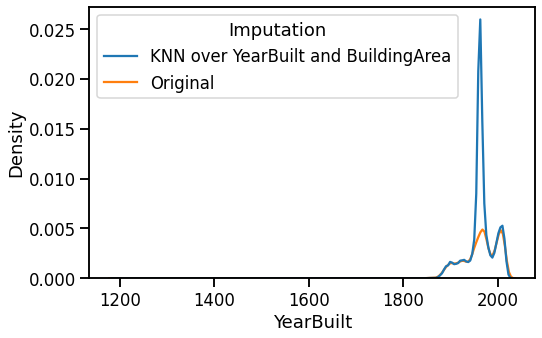

In [ ]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

In [ ]:
melb_data_mice

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,review_scores_location
0,Abbotsford,2,h,1480000.0,S,2.5,3067.0,1.0,1.0,202.0,102.0,1961.8,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,9.688525
1,Abbotsford,2,h,1035000.0,S,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,9.688525
2,Abbotsford,3,h,1465000.0,SP,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,9.688525
3,Abbotsford,3,h,850000.0,PI,2.5,3067.0,2.0,1.0,94.0,102.0,1961.8,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,9.688525
4,Abbotsford,4,h,1600000.0,VB,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,9.688525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13458,Wheelers Hill,4,h,1245000.0,S,16.7,3150.0,2.0,2.0,652.0,73.6,1981.0,Wheelers Hill,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,9.417582
13459,Williamstown,3,h,1031000.0,SP,6.8,3016.0,2.0,2.0,333.0,133.0,1995.0,Williamstown,-37.85927,144.87904,Western Metropolitan,6380.0,9.785714
13460,Williamstown,3,h,1170000.0,S,6.8,3016.0,2.0,4.0,436.0,199.2,1997.0,Williamstown,-37.85274,144.88738,Western Metropolitan,6380.0,9.785714
13461,Williamstown,4,h,2500000.0,PI,6.8,3016.0,1.0,5.0,866.0,157.0,1920.0,Williamstown,-37.85908,144.89299,Western Metropolitan,6380.0,9.785714


In [ ]:
melb_data_mice_full = matriz_densa_ampliada_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice_full[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice_full[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
melb_data_mice_full.isna().sum()

Suburb=Abbotsford         0
Suburb=Aberfeldie         0
Suburb=Airport West       0
Suburb=Albanvale          0
Suburb=Albert Park        0
                         ..
review_scores_location    0
Distance                  0
Propertycount             0
YearBuilt                 0
BuildingArea              0
Length: 630, dtype: int64

In [ ]:
target_data= melb_data_mice_full[['YearBuilt', 'BuildingArea']]

In [ ]:
target_data.head()


,YearBuilt,BuildingArea
0,0.941606,0.001377
1,0.856448,0.001775
2,0.856448,0.003370
3,0.941606,0.001377
4,0.995134,0.003190


In [ ]:
unscaled_predictions = scaler.inverse_transform(target_data)
unscaled_predictions

array([[1970.  ,   61.28],
       [1900.  ,   79.  ],
       [1900.  ,  150.  ],
       ...,
       [1997.  ,  133.4 ],
       [1920.  ,  157.  ],
       [1920.  ,  112.  ]])

In [ ]:
import numpy as np
new_df = pandas.DataFrame(data=unscaled_predictions, columns=['YearBuilt', "BuildingArea"])
new_df.loc[:, 'Imputation'] = 'KNN over all columns'
new_df.head()

,YearBuilt,BuildingArea,Imputation
0,1970.0,61.28,KNN over all columns
1,1900.0,79.00,KNN over all columns
2,1900.0,150.00,KNN over all columns
3,1970.0,61.28,KNN over all columns
4,2014.0,142.00,KNN over all columns


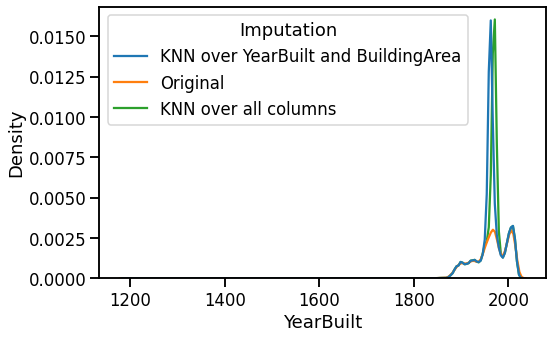

In [ ]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build, new_df])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

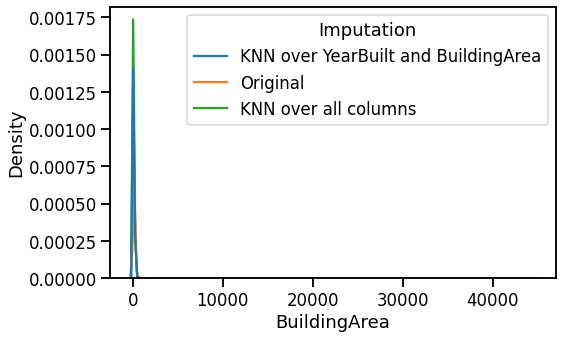

In [ ]:
mice_BuildingArea = melb_data_mice.BuildingArea.to_frame()
mice_BuildingArea['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_BuildingArea = melb_df.BuildingArea.dropna().to_frame()
melb_BuildingArea['Imputation'] = 'Original'
data = pandas.concat([mice_BuildingArea, melb_BuildingArea, new_df])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation')

In [ ]:
new_df.describe()

,YearBuilt,BuildingArea
count,13463.000000,13463.000000
mean,1966.825967,114.307761
std,29.069527,395.939994
min,1196.000000,0.000000
25%,1960.000000,61.280000
50%,1970.000000,85.000000
75%,1975.000000,139.200000
max,2018.000000,44515.000000


## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:
from sklearn.decomposition import PCA
n = min(20, melb_data_mice_full.shape[1])
pca = PCA(n_components=n)
pca.fit(melb_data_mice_full)
proyected_features = pca.transform(melb_data_mice_full)
proyected_features.shape

In [ ]:
pca.explained_variance_ratio_

In [ ]:
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")

In [ ]:
melb_data_mice_full[['pca1_scaled', 'pca2_scaled','pca3_scaled','pca4_scaled','pca5_scaled']] = proyected_features[:,:5]
melb_data_mice_full.head()

In [ ]:
melb_data_mice_full.to_csv('result_melbourne_df.csv', index=False)

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
